In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/artemedius/repo/main/superstore_sales.csv'
df = pd.read_csv(url, index_col=0, encoding= "unicode_escape")
df.columns = df.columns.str.lower()
df[['order date','ship date']] = df[['order date','ship date']].apply(pd.to_datetime)
df = df.reset_index().drop(['Row ID', 'country'], axis=1)

##### Top ten states by total sales

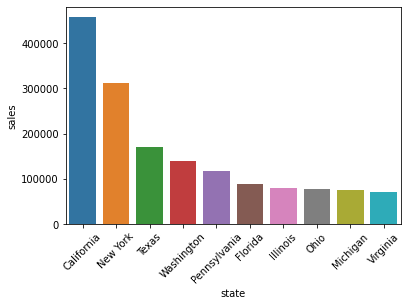

In [73]:
sbs = pd.DataFrame(df.groupby(['state'])['sales'].sum()).reset_index() #sales by state (SBS)
sbshort = sbs.sort_values(by='sales', ascending=False)[0:10]
ax = sns.barplot(x='state', y='sales', data=sbshort)
ax = ax.tick_params(axis='x', rotation=45)

##### Top ten sub-categories by total sales

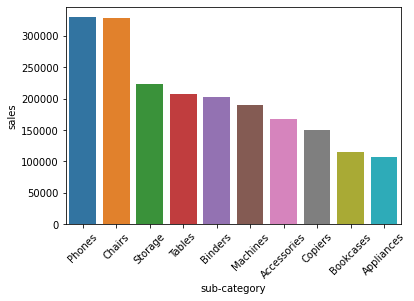

In [74]:
#sales by sub-category
sbs = pd.DataFrame(df.groupby(['sub-category'])['sales'].sum()).reset_index()
sbshort = sbs.sort_values(by='sales', ascending=False)[0:10]
ax = sns.barplot(x='sub-category', y='sales', data=sbshort)
ax = ax.tick_params(axis='x', rotation=45)

([<matplotlib.patches.Wedge at 0x29694431360>,
 [Text(0.8515249005142449, 0.6963514513549932, 'Central'),
  Text(-0.7322875526548411, 0.8208257672775529, 'East'),
  Text(-0.894211121555196, -0.6406141350977191, 'South'),
  Text(0.6016102465233205, -0.9209045071440088, 'West')],
 [Text(0.4644681275532244, 0.3798280643754508, '22%'),
  Text(-0.3994295741753679, 0.44772314578775607, '30%'),
  Text(-0.48775152084828866, -0.3494258918714831, '17%'),
  Text(0.32815104355817476, -0.5023115493512775, '32%')])

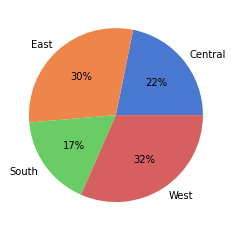

In [75]:
#sales by region
sbr = pd.DataFrame(df.groupby(['region'])['sales'].sum()).reset_index()
sbr['percent'] = sbr['sales']/sbr['sales'].sum()
palette = sns.color_palette('muted')[0:5]
plt.pie(sbr['percent'], labels=sbr['region'], colors=palette, autopct='%.0f%%')